### Análisis de componentes Principales

Antes de iniciar con componentes principales, veremos un breve repaso sobre Eigenvalores, Eigenvectores y SVD

Relación entre Diagonalización y SVD
* Una matriz simétrica siempre es diagonalizable con eigenvalores $\in \mathbb{R}$ 
* Los eigenvectores de una matriz simétrica son ortogonales
* Los igenvectores de una matriz simétrica forman una base de $\mathbb{R}^{n}$


* La diagonalización es exclusiva para matrices cuadradas
* La SVD siempre existe
* Ambas descomposiciones están compuestas por 3 transformaciones lineales

El análisis de componentes principales (PCA por sus siglas en inglés) comprende un procedimiento que transforma un conjunto de variables correlacionadas en un conjunto menor de variables no correlacionadas llamadas **componentes principales**

Entre los objetivos de un PCA se encuentra: reducción de dimensionalidad, visualización e identificar variables significativas subyacentes.

Otra forma de ver el primer objetivo es descubrir la verdadera dimensionalidad de los datos.

**Definición** La _primera componente principal_ de un conjunto de $X_{1}, X_{2}, \dots , X_{p}$ variables. Es la combinación lineal:

$$Z_{1} = e_{11}X_{1} + e_{21}X_{2} + \cdots e_{p1}X_{p}$$

en donde el vector $e_{1}$ se elije de forma que la varianza de $Z_{1}$ se maximice sobre todos los vectores $e_{i}$ cuya norma sea 1.

Se puede demostrar que el valor máximo de la varianza de $Z_{1}$ es igual a $\lambda_{1}$ (el eigenvalor más grande de $\Sigma$ siendo la matriz de covarianzas dada por $\Sigma = \frac{1}{n} X^{T}X$ donde $X$ es la matriz de datos cuyas variables han sido previamente centradas en cero.

La segunda componente definida por 
$$Z_{2} = e_{12}X_{1} + e_{22}X_{2} + \cdots e_{p2}X_{p}$$

se elige de modo que la varianza de $Z_{2}$ sea máxima y que nó esté correlacionada con la primera componente principal $Z_{1}$ y la norma de $e_{2}$ sea igual a 1. Lo anterior se cumple cuando es el eigenvector de $\Sigma$ correspondiente al segundo eigenvalor más grande ($\lambda_{2}$)

De manera semejante se definen los componentes principales adicionales.

**Varianza explicada**

El total de la varianza está dado por la suma de $\lambda_{i}$


En la práctica, una estrategía utilizada para elegir el número de componentes principales es conservar el úmero de componentes que explique el 80%-90% de la varianza.

**Ejemplo de PCA**

Antes de hacer PCA, centraremos nuestras variables para que tengan media cero.

In [1]:
# Importar librerías
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA


import matplotlib.pyplot as plt
from sklearn.datasets import make_s_curve
from mpl_toolkits.mplot3d import Axes3D

from sklearn.manifold import TSNE
from sklearn.datasets import load_digits


In [2]:
# Leer el conjunto de datos Iris
iris = datasets.load_iris()
X = iris.data[:, :4]

PCA usando sklearn

In [3]:
pca = PCA(n_components=4,svd_solver='full')
pca.fit(X)

PCA(n_components=4, svd_solver='full')

In [4]:
# eigenvalores
pca.singular_values_**2

array([630.0080142 ,  36.15794144,  11.65321551,   3.55142885])

In [5]:
# coeficientes de los componentes
print(pca.components_)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]
 [-0.31548719  0.3197231   0.47983899 -0.75365743]]


In [6]:
# Datos transformados (componentes principales)
tabla_z = pca.transform(X)
print(tabla_z)

[[-2.68412563e+00  3.19397247e-01 -2.79148276e-02 -2.26243707e-03]
 [-2.71414169e+00 -1.77001225e-01 -2.10464272e-01 -9.90265503e-02]
 [-2.88899057e+00 -1.44949426e-01  1.79002563e-02 -1.99683897e-02]
 [-2.74534286e+00 -3.18298979e-01  3.15593736e-02  7.55758166e-02]
 [-2.72871654e+00  3.26754513e-01  9.00792406e-02  6.12585926e-02]
 [-2.28085963e+00  7.41330449e-01  1.68677658e-01  2.42008576e-02]
 [-2.82053775e+00 -8.94613845e-02  2.57892158e-01  4.81431065e-02]
 [-2.62614497e+00  1.63384960e-01 -2.18793179e-02  4.52978706e-02]
 [-2.88638273e+00 -5.78311754e-01  2.07595703e-02  2.67447358e-02]
 [-2.67275580e+00 -1.13774246e-01 -1.97632725e-01  5.62954013e-02]
 [-2.50694709e+00  6.45068899e-01 -7.53180094e-02  1.50199245e-02]
 [-2.61275523e+00  1.47299392e-02  1.02150260e-01  1.56379208e-01]
 [-2.78610927e+00 -2.35112000e-01 -2.06844430e-01  7.88791149e-03]
 [-3.22380374e+00 -5.11394587e-01  6.12996725e-02  2.16798118e-02]
 [-2.64475039e+00  1.17876464e+00 -1.51627524e-01 -1.59209718e

In [7]:
# Varianza explicada
print(pca.explained_variance_ratio_)

[0.92461872 0.05306648 0.01710261 0.00521218]


Corroborar la varianza explicada. 

Los valores singulares al cuadrado son los eigenvalores.

Si cada eigenvalor lo dividimos por la suma de todos los eigenvalores obtenemos su respectiva varianza explicada

In [8]:
pca.singular_values_**2 / np.sum(pca.singular_values_**2 )

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

Corroborar que los componentes no están correlacionados.

Al hacer el producto punto de cada componente con los demás debe dar cero. En forma matricial esto es $Z^{T}Z$

In [9]:
 np.round(tabla_z.T@tabla_z,2)

array([[630.01,   0.  ,   0.  ,   0.  ],
       [  0.  ,  36.16,   0.  ,   0.  ],
       [  0.  ,   0.  ,  11.65,   0.  ],
       [  0.  ,   0.  ,   0.  ,   3.55]])

PCA usando SVD

In [10]:
# Función para PCA
def PCA_from_SVD(A):
    """
    Función para PCA a partir de la SVD de numpy 
    params: A: matriz de datos
    return: valores_singulares: Los valores singulares de la descomposición SVD
    componentes: Los coeficientes para calcular los componentes principales
    Z: Los datos transformados (componentes principales)
    varianza_explicada	La varianza explicada por cada componente principal
    """
    
    # Centrar los datos
    A = np.array(A) # convertir los datos a un numpy array por si vienen de un DataFrame
    A_centered = A - A.mean(axis=0)
    
    # Calcular SVD
    U, S, Vt = np.linalg.svd(A_centered, full_matrices=False)
    
    # Los valores singulares
    valores_singulares = S
    
    # Los componentes (coeficientes)
    componentes = ((Vt.T))
    
    # Los datos transformados (componentes principales)
    Z = A_centered@np.transpose(Vt)
    
    # La varianza explicada
    varianza_explicada = S**2/np.sum(S**2)
    
   
    # regresar 4 objetos
    return valores_singulares, componentes.T, Z, varianza_explicada


In [11]:
# Ejecutar función
valores_singulares, coeficientes, Z, varianza_explicada = PCA_from_SVD(X)

In [12]:
valores_singulares

array([25.09996044,  6.01314738,  3.41368064,  1.88452351])

In [13]:
coeficientes

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [-0.65658877, -0.73016143,  0.17337266,  0.07548102],
       [ 0.58202985, -0.59791083, -0.07623608, -0.54583143],
       [ 0.31548719, -0.3197231 , -0.47983899,  0.75365743]])

In [14]:
# Z es nuestro nuevo data frame de datos transformados 
print(Z)

[[-2.68412563e+00 -3.19397247e-01  2.79148276e-02  2.26243707e-03]
 [-2.71414169e+00  1.77001225e-01  2.10464272e-01  9.90265503e-02]
 [-2.88899057e+00  1.44949426e-01 -1.79002563e-02  1.99683897e-02]
 [-2.74534286e+00  3.18298979e-01 -3.15593736e-02 -7.55758166e-02]
 [-2.72871654e+00 -3.26754513e-01 -9.00792406e-02 -6.12585926e-02]
 [-2.28085963e+00 -7.41330449e-01 -1.68677658e-01 -2.42008576e-02]
 [-2.82053775e+00  8.94613845e-02 -2.57892158e-01 -4.81431065e-02]
 [-2.62614497e+00 -1.63384960e-01  2.18793179e-02 -4.52978706e-02]
 [-2.88638273e+00  5.78311754e-01 -2.07595703e-02 -2.67447358e-02]
 [-2.67275580e+00  1.13774246e-01  1.97632725e-01 -5.62954013e-02]
 [-2.50694709e+00 -6.45068899e-01  7.53180094e-02 -1.50199245e-02]
 [-2.61275523e+00 -1.47299392e-02 -1.02150260e-01 -1.56379208e-01]
 [-2.78610927e+00  2.35112000e-01  2.06844430e-01 -7.88791149e-03]
 [-3.22380374e+00  5.11394587e-01 -6.12996725e-02 -2.16798118e-02]
 [-2.64475039e+00 -1.17876464e+00  1.51627524e-01  1.59209718e

In [15]:
varianza_explicada

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

Los componentes no están correlacionados

In [16]:
 np.round(Z.T@Z,2)

array([[630.01,  -0.  ,  -0.  ,  -0.  ],
       [ -0.  ,  36.16,  -0.  ,   0.  ],
       [ -0.  ,  -0.  ,  11.65,   0.  ],
       [ -0.  ,   0.  ,   0.  ,   3.55]])

**Porcentaje de varianza explicada**

In [17]:
import matplotlib.pyplot as plt
from PIL import Image

import pandas as pd

In [18]:
# Importar imagen
imagen = Image.open('/home/leonardo/Documentos/Acatlan/datos_masivos_II_2022/imagenes/teatro_opera_espacial.png')
imagen_gris = imagen.convert('LA')   ## Convertir a escala de grises


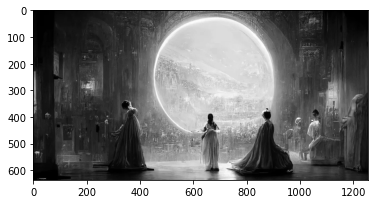

In [19]:
## Convertir la imagen a una matriz

imagen_mat = np.array(list(imagen_gris.getdata(band=0)), float)
imagen_mat.shape = (imagen_gris.size[1], imagen_gris.size[0])
imagen_mat = np.matrix(imagen_mat)

plt.imshow(imagen_mat, cmap='gray')

In [20]:
# Dimensiones de la imagen
imagen_mat.shape

(636, 1256)

In [21]:
# Aplicar PCA
pca_opera = PCA()
pca_opera.fit(imagen_mat)

PCA()

In [22]:
# Varianza explicada
pca_opera.explained_variance_ratio_[:10]

array([0.49216385, 0.1463806 , 0.0706099 , 0.04827239, 0.03531746,
       0.02044381, 0.01523499, 0.01435591, 0.01067761, 0.0096255 ])

In [23]:
# Núm Componentes 
nc = len(pca_opera.explained_variance_ratio_)
nc

636

In [24]:
# Definir vector de números consecutivos para representar el número de componentes
num_componentes = [(i+1) for i in range(nc)]

# Definir vector con la varianza explicada acumulada
varianza_explicada_acumulada = np.cumsum(pca_opera.explained_variance_ratio_)

In [25]:

df = pd.concat([pd.Series(num_componentes), pd.Series(varianza_explicada_acumulada)], axis = 1)
df.columns =["num_componentes","pct_varianza_explicada"]
df.head()

,num_componentes,pct_varianza_explicada
0,1,0.492164
1,2,0.638544
2,3,0.709154
3,4,0.757427
4,5,0.792744


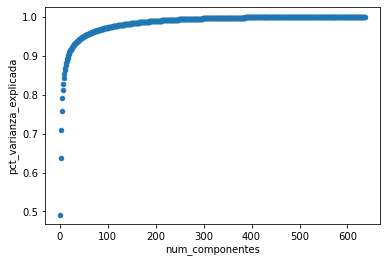

In [26]:
df.plot.scatter(x = "num_componentes", y = "pct_varianza_explicada")

In [27]:
filtro = df['pct_varianza_explicada'] > 0.9
df[filtro].head()

,num_componentes,pct_varianza_explicada
17,18,0.902412
18,19,0.905622
19,20,0.908473
20,21,0.911106
21,22,0.913583


### Ejemplo de Visualización

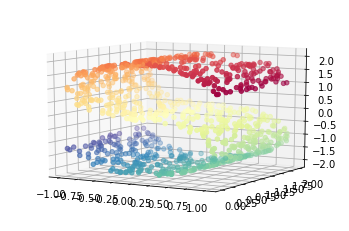

In [28]:
# from sklearn.datasets import make_s_curve
# from mpl_toolkits.mplot3d import Axes3D

X, color= make_s_curve(n_samples=1000)


plt.close()

fig = plt.figure()

ax = plt.axes(projection = '3d')

ax.scatter3D(X[:,0], X[:,1], X[:,2], c=color, cmap=plt.cm.Spectral)
ax.view_init(10, -60)

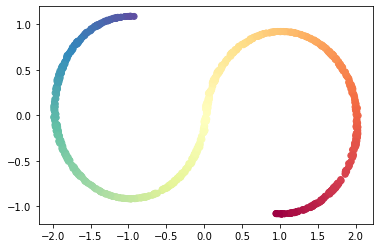

In [29]:
#from sklearn.decomposition import PCA
pca = PCA(n_components = 2).fit(X)
X_pca = pca.transform(X)
plt.close()
plt.scatter(X_pca[:,0], X_pca[:,1], c=color, cmap=plt.cm.Spectral)

Otros métodos: **t-SNE**


Existen otros métodos para reducir dimensionalidad. Mostraremos una de estas técnicas: [t-SNE](http://jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf), *t-Stochastic Neighbor Embedding*.


Como motivación a esta técnica, observemos primero que los métodos como componentes principales buscan obtener una representación que mantenga lejos casos que son muy diferentes, pues buscamos aproximar los datos, o encontrar direcciones de máxima varianza. Sin embargo, en algunos casos los que más nos puede interesar es una representación que **mantenga casos similares cercanos**, aún cuando perdamos información acerca de distancia de casos muy distintos.




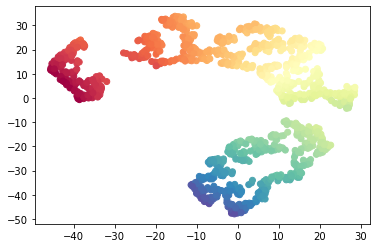

In [30]:
# from sklearn.manifold import TSNE
tsne = TSNE()

X_tsne = tsne.fit_transform(X)

plt.close()
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=color, cmap=plt.cm.Spectral)